In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/ACER/Documents/causal/data_pickle.csv')
df[:3]

In [42]:
from sklearn.model_selection import train_test_split
from causallearn.search.ConstraintBased.FCI import fci

data_array = df.values
train, test = train_test_split(data_array, test_size=0.5, random_state=42)

pc_train,edges_train = fci(train)
pc_test,edges_test = fci(test)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [43]:
true_adj = pc_train
inferred_adj = pc_test

In [49]:
def calculate_mcc(arrowsTp, arrowsTn, arrowsFp, arrowsFn):
    numerator = (arrowsTp * arrowsTn) - (arrowsFp * arrowsFn)
    denominator = ((arrowsTp + arrowsFp) * (arrowsTp + arrowsFn) * (arrowsTn + arrowsFp) * (arrowsTn + arrowsFn)) ** 0.5
    if denominator == 0:
        return 0
    return numerator / denominator
    
def calculate_fdr(arrowsTp, arrowsFp):
    """Menghitung False Discovery Rate (FDR)."""
    if (arrowsTp + arrowsFp) == 0:
        return 0  # Untuk menghindari pembagian dengan nol
    return arrowsFp / (arrowsTp + arrowsFp)

def calculate_sid(arrowsTp, arrowsTn, arrowsFp, arrowsFn):
    """Menghitung Structural Independence Distance (SID)."""
    return arrowsFp + arrowsFn

In [50]:
from causallearn.graph.ArrowConfusion import ArrowConfusion
from causallearn.graph.AdjacencyConfusion import AdjacencyConfusion
from causallearn.graph.SHD import SHD

# For arrows
arrow = ArrowConfusion(true_adj, inferred_adj)

arrowsTp = arrow.get_arrows_tp()
arrowsFp = arrow.get_arrows_fp()
arrowsFn = arrow.get_arrows_fn()
arrowsTn = arrow.get_arrows_tn()

arrowPrec = arrow.get_arrows_precision()
arrowRec = arrow.get_arrows_recall()
# For adjacency matrices
adj = AdjacencyConfusion(true_adj, inferred_adj)

adjTp = adj.get_adj_tp()
adjFp = adj.get_adj_fp()
adjFn = adj.get_adj_fn()
adjTn = adj.get_adj_tn()
adjPrec = adj.get_adj_precision()
adjRec = adj.get_adj_recall()

shd = SHD(true_adj, inferred_adj).get_shd()
mcc = calculate_mcc(arrowsTp, arrowsTn, arrowsFp, arrowsFn)
fdr = calculate_fdr(arrowsTp, arrowsFp)
sid = calculate_sid(arrowsTp, arrowsTn, arrowsFp, arrowsFn)


#print(f"Arrows True Positive: {arrowsTp}, False Positive: {arrowsFp}, False Negative: {arrowsFn}, True Negative: {arrowsTn}")
#print(f"Arrow Precision: {arrowPrec}, Recall: {arrowRec}")
#print(f"Adjacency True Positive: {adjTp}, False Positive: {adjFp}, False Negative: {adjFn}, True Negative: {adjTn}")
#print(f"Adjacency Precision: {adjPrec}, Recall: {adjRec}")
print(f"SHD: {shd}")
print(f"SID: {sid}")
print(f"FDR: {fdr}")
print(f"MCC: {mcc}")



SHD: 7
SID: 4.0
FDR: 1.0
MCC: -0.008968609865470852


In [51]:
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(pc_test)
pdy.write_png('simple_test_pickel.png')

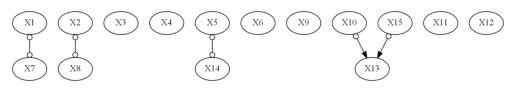

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'simple_test_pickel.png'  
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()